<a href="https://colab.research.google.com/github/Narita-1095305/AI-datascience-math/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%92%E4%BD%BF%E3%81%A3%E3%81%9F%E5%88%86%E6%9E%90%E3%82%92%E8%A1%8C%E3%81%A3%E3%81%A6%E3%81%BF%E3%82%88%E3%81%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Colaboratory環境の設定
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AI-datascience-math/chapter2

Mounted at /content/drive
/content/drive/MyDrive/AI-datascience-math/chapter2


**2-1:顧客の行動パターンの類似度を計算しよう**

In [15]:
import pandas as pd
df_info = pd.read_csv("accomodation_info.csv", index_col=0, parse_dates=[0])
df_info

,顧客ID,宿泊者名,プラン,金額
日時,,,,
2018-11-01 00:02:21,110034,若松 花子,B,19000
2018-11-01 00:03:10,112804,津田 美加子,D,20000
2018-11-01 00:06:19,110275,吉本 美加子,D,20000
2018-11-01 00:08:41,110169,坂本 直人,B,19000
2018-11-01 00:12:22,111504,青山 零,A,15000
...,...,...,...,...
2020-10-31 23:38:51,110049,吉本 篤司,A,3000
2020-10-31 23:42:12,110127,喜嶋 浩,A,3000
2020-10-31 23:47:24,115464,藤本 明美,D,8000


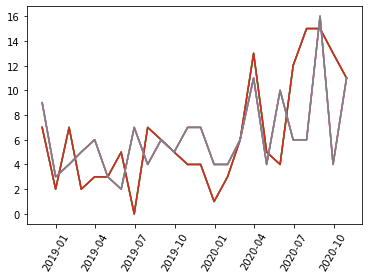

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
#indexの抽出
x_0 = df_info.resample('M').count()
x_0 = x_0.drop(x_0.columns.values,axis=1)
# 順位の設定
i_rank = 1
j_rank = 2
# 顧客IDの抽出
i_id = df_info['顧客ID'].value_counts().index[i_rank]
j_id = df_info['顧客ID'].value_counts().index[j_rank]
# 月ごとの利用回数を特徴量として抽出
x_i = df_info[df_info['顧客ID'] == i_id].resample('M').count()
x_j = df_info[df_info['顧客ID'] == j_id].resample('M').count()
# 欠損地の穴埋め
x_i = pd.concat([x_0, x_i], axis=1).fillna(0)
x_j = pd.concat([x_0, x_j], axis=1).fillna(0)
# 描画

plt.plot(x_i)
plt.plot(x_j)
plt.xticks(rotation=60)
plt.show()

In [18]:
import pandas as pd
import numpy as np

dx = x_i.iloc[:,0].values-x_j.iloc[:,0].values

n = np.linalg.norm(dx)

num_dim = len(x_i)
d = n / num_dim
print("類似度:",d)

類似度: 0.798218502527834


**2-3:大口顧客の類似性を主成分分析によって確認しよう**

In [19]:
import pandas as pd
# indexの調整
x_0 = df_info.resample('M').count()
x_0 = x_0.drop(x_0.columns.values,axis=1)
# 配列を準備
list_vector = []
# 人数の設定
num = 100
for i_rank in range(num):
    # 顧客IDの抽出
    i_id = df_info['顧客ID'].value_counts().index[i_rank]
    # 月ごとの利用回数を特徴量として抽出
    x_i = df_info[df_info['顧客ID']==i_id].resample('M').count()
    # 欠損値があった場合の穴埋め
    x_i = pd.concat([x_0, x_i], axis=1).fillna(0)
    # 特徴ベクトルとして追加
    list_vector.append(x_i.iloc[:,0].values.tolist())

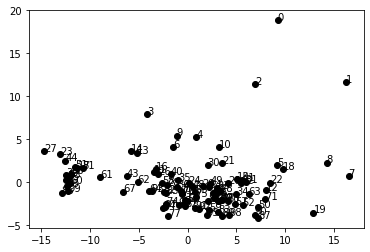

In [20]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
# 特徴ベクトルを変換
features = np.array(list_vector)
# 主成分分析を実施
pca = PCA()
pca.fit(features)
# 特徴ベクトルを主成分に変換
transformed = pca.fit_transform(features)
# 可視化
for i in range(len(transformed)):
    plt.scatter(transformed[i,0],transformed[i,1],color="k")
    plt.text(transformed[i,0],transformed[i,1],str(i))
plt.show()

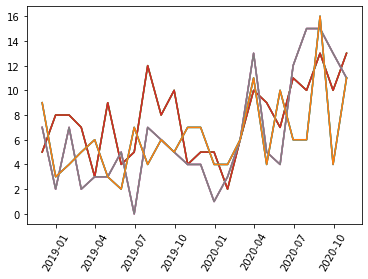

In [21]:
import pandas as pd
# indexの抽出
x_0 = df_info.resample('M').count()
x_0 = x_0.drop(x_0.columns.values,axis=1)

# 順位の設定
list_rank = [0,1,2]
x = []
for i_rank in list_rank:
    # 顧客IDの抽出
    i_id = df_info['顧客ID'].value_counts().index[i_rank]
    # 月ごとの利用回数を特徴量として抽出
    x_i = df_info[df_info['顧客ID']==i_id].resample('M').count()
    # 欠損値があった場合の穴埋め
    x_i = pd.concat([x_0, x_i], axis=1).fillna(0)
    # 描画
    plt.plot(x_i)
    plt.xticks(rotation=60)
plt.show()

**2-5:大口顧客同士の行動パターンの違いをクラスタリングによって可視化しよう**

In [22]:
from sklearn.cluster import KMeans

num_of_cluster = 4

model = KMeans(n_clusters=num_of_cluster, random_state=0)
model.fit(features)
pred_class = model.labels_
print(pred_class)

[3 3 3 1 1 2 1 3 3 1 1 1 2 0 0 2 1 0 2 2 2 2 2 0 1 2 1 0 1 2 1 2 2 2 2 1 1
 1 0 0 1 2 1 0 0 2 0 2 1 2 2 0 2 0 2 1 1 2 1 2 0 0 1 2 1 2 1 0 0 2 1 2 1 1
 1 1 1 1 2 2 2 0 1 2 1 1 0 2 1 2 2 1 1 1 1 1 1 1 2 0]


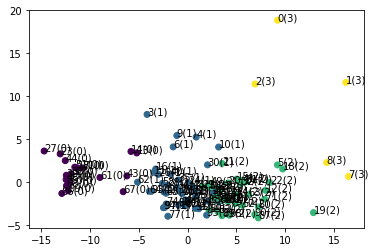

In [23]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(features)

transformed = pca.fit_transform(features)

plt.scatter(transformed[:,0],transformed[:,1],c=pred_class)
for i in range(len(transformed)):
  text = str(i) + "(" + str(pred_class[i]) + ")"
  plt.text(transformed[i,0],transformed[i,1],text)
plt.show()

**2-6:決定木によって行動の原因を推定してみよう**

In [12]:
import numpy as np
target_class = 1

num = len(pred_class)
data_o = np.zeros(num)
for i in range(num):
  if pred_class[i] == target_class:
    data_o[i] = True
  else:
    data_o[i] = False
print(data_o)

[0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 0.]


In [24]:
data_e = features
print(data_e)

[[ 5.  8.  8. ... 13. 10. 13.]
 [ 7.  2.  7. ... 15. 13. 11.]
 [ 9.  3.  4. ... 16.  4. 11.]
 ...
 [ 6.  6.  3. ...  3.  3.  5.]
 [ 0.  3.  2. ...  8.  6.  4.]
 [ 6.  3.  5. ...  1.  2.  0.]]


In [26]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

clf = DecisionTreeClassifier(max_depth=2)
clf = clf.fit(data_e,data_o)

In [ ]:
!pip install dtreeviz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


DatetimeIndex(['2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31'],
              dtype='datetime64[ns]', name='日時', freq='M')


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


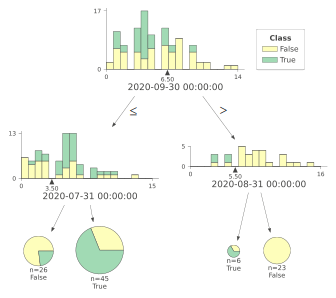

In [32]:
from dtreeviz.trees import dtreeviz

# indexの抽出
x_0 = df_info.resample('M').count()
x_0 = x_0.drop(x_0.columns.values,axis=1)
time_index = x_0.index
print(time_index)

# 決定木を描画
viz = dtreeviz(
    clf,
    data_e, 
    data_o,
    target_name='Class',
    feature_names=time_index,
    class_names=['False','True'],
) 
viz